In [1]:
import sqlite3
from typing import List

import pandas as pd

db_file = "kl_cars.db"

con = sqlite3.connect(db_file)
cur = con.cursor()

In [2]:
data = pd.read_sql("select * from car", con)

# Datenanzahl pro Klasse 

In [9]:
data['model'] = data['model'].apply(lambda x: '' if x.__contains__(" km") else x)
classes = data[['brand', 'model']].apply(lambda row: ' - '.join(row.values.astype(str)), axis=1)
class_count = classes.value_counts()
insufficient_class_counts = class_count[class_count < 100]
print(f"Number of Images {len(classes)}")
print(f"Number of Classes {len(class_count)}")
print(f"Mean number of Images per Classes {class_count.mean()}")
print(f"Number of classes with more than 100 images {len(class_count) - len(insufficient_class_counts)}")
print(f"Number of classes with less than 100 images {len(insufficient_class_counts)}")
print(f"Number of classes with less than 10 images {len(class_count[class_count < 10])}")

Number of Images 13782
Number of Classes 615
Mean number of Images per Classes 22.409756097560976
Number of classes with more than 100 images 31
Number of classes with less than 100 images 584
Number of classes with less than 10 images 414


In [4]:
insufficient_class_counts = class_count[class_count < 100]
insufficient_class_counts

Renault - Clio               98
Seat - Ibiza                 96
Volkswagen - Caddy           91
Ford - Transit               86
Audi - A5                    82
                             ..
Mercedes Benz - CE-Klasse     1
Lancia - Thema                1
Nissan - Weitere Nissan       1
Toyota - Celica               1
Peugeot - 6er Reihe           1
Name: count, Length: 584, dtype: int64

In [73]:
print(f"Anzahl an nicht zugeordneten Marken: {len(data[data['brand'] == 'Weitere Automarken'])}")

Anzahl an nicht zugeordneten Marken: 126


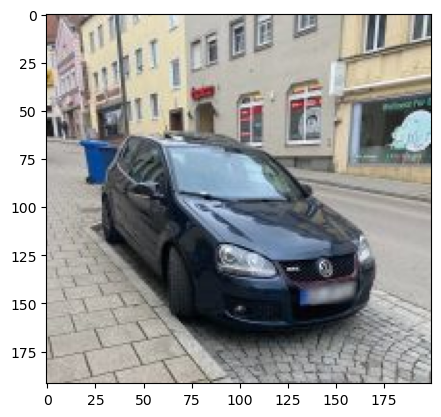

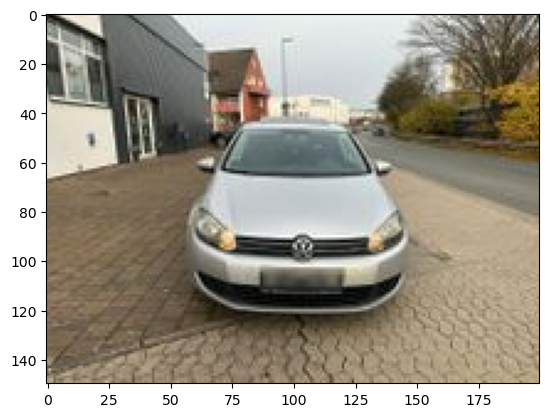

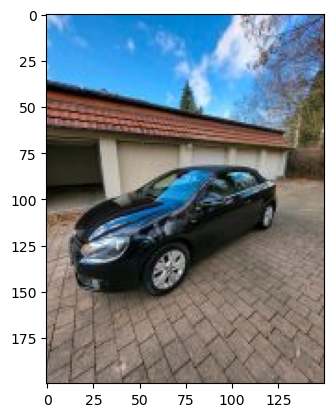

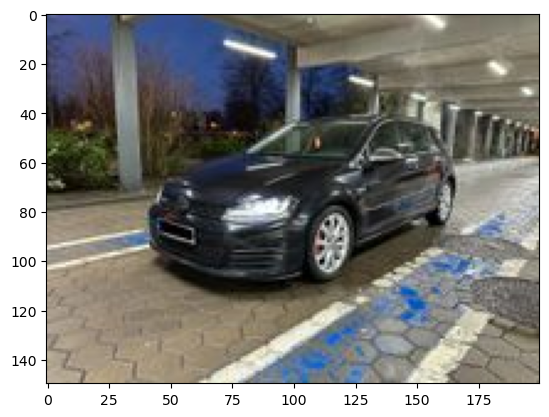

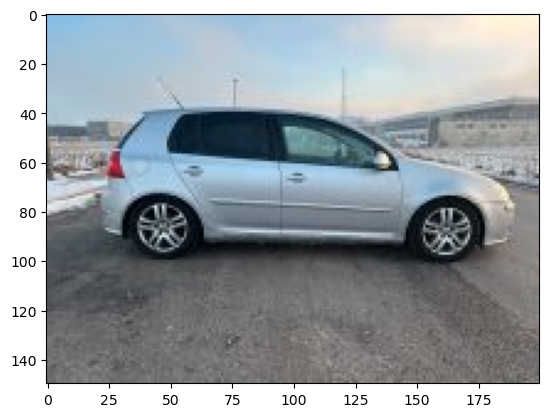

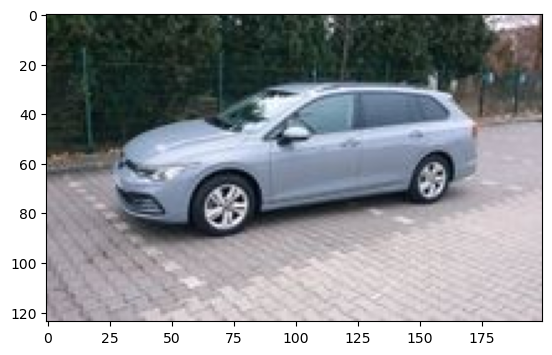

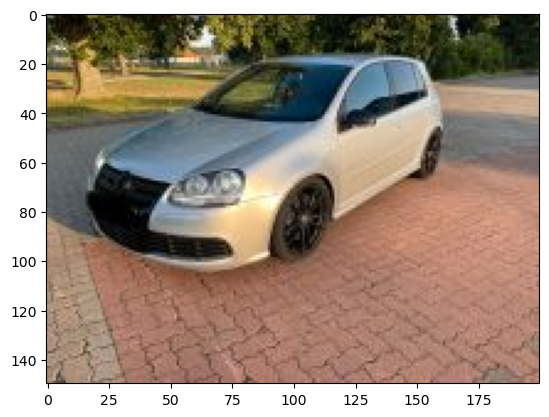

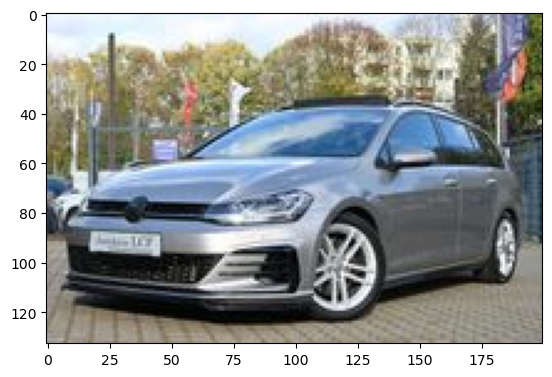

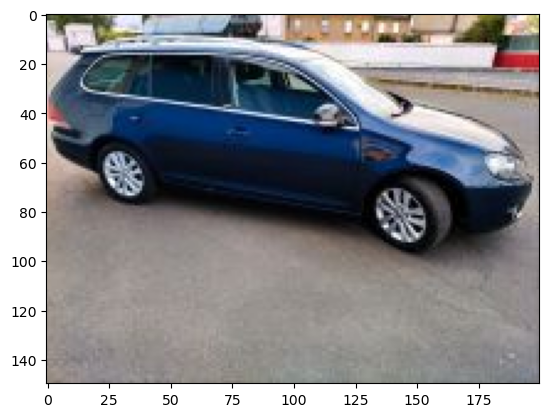

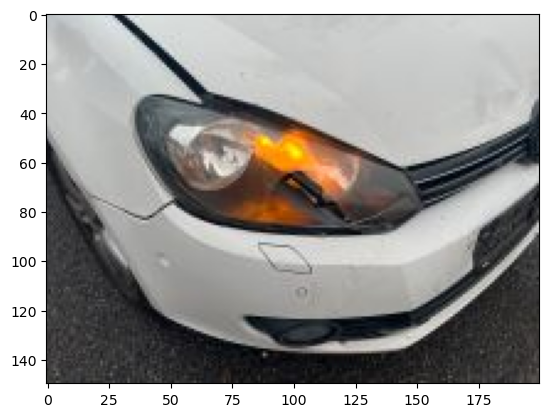

In [57]:
from PIL import Image
from io import BytesIO

def show_examples(brand, model):
    examples = data[(data['brand'] == brand) & (data['model'] == model)]
    return [Image.open(BytesIO(img)) for img in examples['image'][:10]]

from matplotlib import pyplot
images = show_examples('Volkswagen', 'Golf')
for image in images:
    pyplot.imshow(image)
    pyplot.show()

In [8]:
class_count

Volkswagen - Golf            995
BMW - 3er                    600
Mercedes Benz - C-Klasse     401
BMW - 5er                    362
Volkswagen - Polo            344
                            ... 
Mercedes Benz - CE-Klasse      1
Lancia - Thema                 1
Nissan - Weitere Nissan        1
Toyota - Celica                1
Peugeot - 6er Reihe            1
Name: count, Length: 615, dtype: int64

In [7]:
con.close()